# Load Data

In [21]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "archive.zip"

# Directory to extract files
extract_to = "data_dir"


# Only unzip if not already extracted
if not os.path.exists(extract_to) or not os.listdir(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")
    print(f"✅ Extracted to: {extract_to}")
else:
    print(f"✅ Data already extracted in: {extract_to}")

✅ Data already extracted in: data_dir


# Explore Data File Structure

In [22]:
# See what files were extracted
json_files = os.listdir(extract_to)
print(json_files[:10])  # Print first 10 files

['october-07-2020.json', 'october-11-1984.json', 'october-11-2000.json', 'october-11-2012.json', 'october-13-1960.json', 'october-13-1988.json', 'october-13-1992.json', 'october-13-2004.json', 'october-15-1992.json', 'october-15-2008.json']


# Convert to Dataframe

In [23]:
import os
import json
import pandas as pd

# 📜 Collect all JSON file paths
json_files = [
    os.path.join(extract_to, f)
    for f in os.listdir(extract_to)
    if f.endswith(".json")
]

# 📊 List to store data from all files
all_rows = []

# 🔁 Loop through each JSON file
for file_path in json_files:
    with open(file_path, "r", encoding="utf-8") as f:
        debate = json.load(f)
        content = debate.get("content", [])
        date = " ".join(debate.get("date", []))
        
        for entry in content:
            actor = entry.get("actor", "UNKNOWN")
            dialogue = entry.get("dialogue", "")
            all_rows.append({"date": date, "actor": actor, "dialogue": dialogue})

# 🧱 Create one DataFrame
df = pd.DataFrame(all_rows)

# ✅ Preview the result
df.head(20)  # Or use df.tail() to see end

,date,actor,dialogue
0,October 07 2020,Participants,Senator Kamala Harris (D-CA) and
1,October 07 2020,Moderator,Susan Page (USA Today)
2,October 07 2020,Page,Good evening. From the University of Utah in S...
3,October 07 2020,Pence,Thank you.
4,October 07 2020,Page,Senator Harris and Vice President Pence thank ...
5,October 07 2020,Harris,"Thank you Susan. Well, the American people hav..."
6,October 07 2020,Page,"Thank you- Thank you, Senator Harris. Thank yo..."
7,October 07 2020,Pence,Susan thank you. And I want to thank the Commi...
8,October 07 2020,Page,"Thank you, Vice Pres- Thank you Vice President..."
9,October 07 2020,Harris,"Oh, absolutely. Whatever the Vice Presidents c..."


# Explore Dataframe

In [24]:
df.shape

(9243, 3)

In [25]:
df_trump = df[df["actor"].str.contains("trump", case=False, na=False)]
df_trump.head(20)

,date,actor,dialogue
2954,October 19 2016,Trump,"Well, first of all, its great to be with you, ..."
2958,October 19 2016,Trump,"Well, the D.C. vs. Heller decision was very st..."
2962,October 19 2016,Trump,"Well, let me just tell you before we go any fu..."
2964,October 19 2016,Trump,Right.
2966,October 19 2016,Trump,"Well, if that would happen, because I am pro-l..."
2968,October 19 2016,Trump,"If they overturned it, it will go back to the ..."
2970,October 19 2016,Trump,"Well, if we put another two or perhaps three j..."
2978,October 19 2016,Trump,"Well, I think its terrible. If you go with wha..."
2981,October 19 2016,Trump,"And, honestly, nobody has business doing what ..."
2983,October 19 2016,Trump,"Well, first of all, she wants to give amnesty,..."


In [26]:
df_trump_2020 = df_trump[df_trump["date"].str.contains("2020")]
df_trump_2020.head(30)

,date,actor,dialogue
3960,October 22 2020,Trump,"So, as you know, 2.2 million people, modeled o..."
3964,October 22 2020,Trump,"No, its not a guarantee but it will be by the ..."
3966,October 22 2020,Trump,Johnson and Johnson is doing very well. Modern...
3968,October 22 2020,Trump,"No, I think my timeline is going to be more ac..."
3972,October 22 2020,Trump,I dont think were going to have a dark winter ...
3976,October 22 2020,Trump,I did not say over soon. I say were learning t...
3982,October 22 2020,Trump,Excuse me.
3984,October 22 2020,Trump,I take full responsibility. Its not my fault t...
3988,October 22 2020,Trump,"Look, perhaps just to finish this, I was kiddi..."
3990,October 22 2020,Trump,You certainly did.


# Sentiment Score over Time (VADER)

In [27]:
# Extract the year (assumes format like "October 21 1984")
df["year"] = df["date"].apply(lambda x: x.split()[-1])

# Preview the updated DataFrame
df.head(20)

,date,actor,dialogue,year
0,October 07 2020,Participants,Senator Kamala Harris (D-CA) and,2020
1,October 07 2020,Moderator,Susan Page (USA Today),2020
2,October 07 2020,Page,Good evening. From the University of Utah in S...,2020
3,October 07 2020,Pence,Thank you.,2020
4,October 07 2020,Page,Senator Harris and Vice President Pence thank ...,2020
5,October 07 2020,Harris,"Thank you Susan. Well, the American people hav...",2020
6,October 07 2020,Page,"Thank you- Thank you, Senator Harris. Thank yo...",2020
7,October 07 2020,Pence,Susan thank you. And I want to thank the Commi...,2020
8,October 07 2020,Page,"Thank you, Vice Pres- Thank you Vice President...",2020
9,October 07 2020,Harris,"Oh, absolutely. Whatever the Vice Presidents c...",2020


In [29]:
# 📦 Step 1: Install VADER
!pip install vaderSentiment

# 📥 Step 2: Import and Initialize VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

# 📊 Step 3: Apply sentiment analysis to 'dialogue' column
df["sentiment_score"] = df["dialogue"].apply(lambda text: analyzer.polarity_scores(text)["compound"])

# ✅ Step 4: Preview the DataFrame
df.head(20)

,date,actor,dialogue,year,sentiment_score
0,October 07 2020,Participants,Senator Kamala Harris (D-CA) and,2020,0.0000
1,October 07 2020,Moderator,Susan Page (USA Today),2020,0.0000
2,October 07 2020,Page,Good evening. From the University of Utah in S...,2020,0.9578
3,October 07 2020,Pence,Thank you.,2020,0.3612
4,October 07 2020,Page,Senator Harris and Vice President Pence thank ...,2020,0.7385
5,October 07 2020,Harris,"Thank you Susan. Well, the American people hav...",2020,0.9369
6,October 07 2020,Page,"Thank you- Thank you, Senator Harris. Thank yo...",2020,-0.6390
7,October 07 2020,Pence,Susan thank you. And I want to thank the Commi...,2020,0.9777
8,October 07 2020,Page,"Thank you, Vice Pres- Thank you Vice President...",2020,0.8402
9,October 07 2020,Harris,"Oh, absolutely. Whatever the Vice Presidents c...",2020,-0.5859


In [30]:
avg_sentiment_by_year = df.groupby("year")["sentiment_score"].mean().reset_index()
avg_sentiment_by_year.columns = ["year", "avg_sentiment_score"]

# Show result
avg_sentiment_by_year.head(30)

,year,avg_sentiment_score
0,1960,0.324234
1,1976,0.279629
2,1980,0.221122
3,1984,0.142633
4,1988,0.259765
5,1992,0.189286
6,1996,0.332255
7,2000,0.280824
8,2004,0.147317
9,2008,0.209572


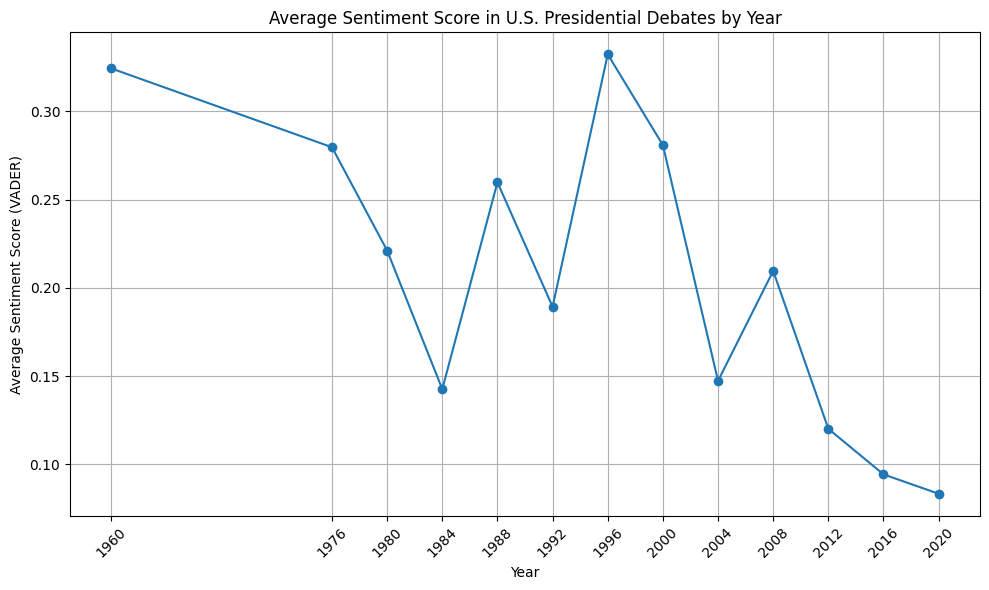

In [31]:
import matplotlib.pyplot as plt

# Ensure years are sorted numerically if they are strings
avg_sentiment_by_year["year"] = avg_sentiment_by_year["year"].astype(int)
avg_sentiment_by_year = avg_sentiment_by_year.sort_values("year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    avg_sentiment_by_year["year"],
    avg_sentiment_by_year["avg_sentiment_score"],
    marker="o",
    linestyle="-"
)
plt.title("Average Sentiment Score in U.S. Presidential Debates by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score (VADER)")
plt.xticks(avg_sentiment_by_year["year"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sentiment Score over Time (BERT)

In [ ]:
#!pip install transformers torch --quiet

In [32]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Build the sentiment pipeline
bert_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to convert "X stars" → normalized sentiment score [-1, 1]
def star_to_score(label):
    stars = int(label.split()[0])  # Extract number from 'X stars'
    return (stars - 3) / 2         # Normalize: 1→-1, 3→0, 5→+1

# Function to compute BERT sentiment in batches
def compute_bert_sentiments(dialogues, batch_size=100):
    scores = []
    for i in range(0, len(dialogues), batch_size):
        batch = dialogues[i:i+batch_size]
        result = bert_pipeline(batch, truncation=True)
        scores.extend([star_to_score(r["label"]) for r in result])
    return scores

# Add sentiment score to DataFrame
df["bert_sentiment_score"] = compute_bert_sentiments(df["dialogue"].tolist())

# Preview
df[["date", "actor", "dialogue", "sentiment_score", "bert_sentiment_score"]].head(10)

c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\danie\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adm

KeyboardInterrupt: 